<a href="https://colab.research.google.com/github/am-ui/Amit-kumar-pathak/blob/master/task5_business_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#task 5

# business_analysis

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv("/content/SampleSuperstore.csv")

In [4]:
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.shape

(9994, 13)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
col=["Postal Code"]
data=data.drop(columns=col,axis=1)

In [11]:
correlat=data.corr()

# visualization of the data

#since  features are more related to the profit

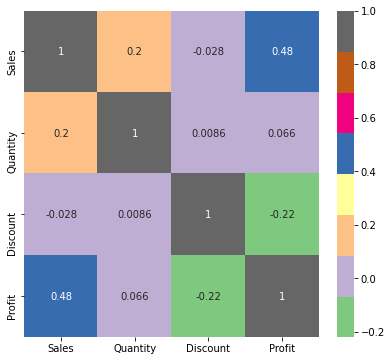

In [12]:

plt.figure(figsize=(6.6,6))
sns.heatmap(correlat,annot=True,cmap='Accent')

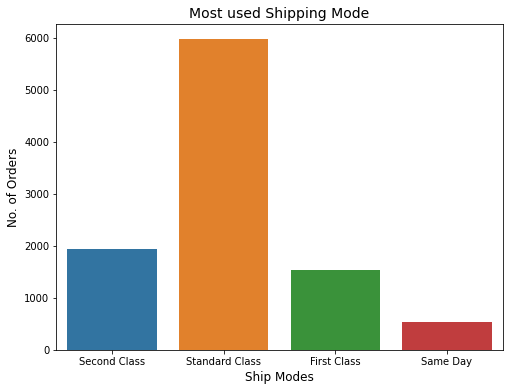

In [14]:
plt.figure(figsize=(8,6))
plt.title('Most used Shipping Mode',size=14)
sns.countplot(data['Ship Mode'])
plt.xlabel('Ship Modes',size=12)
plt.ylabel('No. of Orders',size=12)
plt.show()

# Categories the most ordered items

          Category  Quantity
0        Furniture      8028
1  Office Supplies     22906
2       Technology      6939


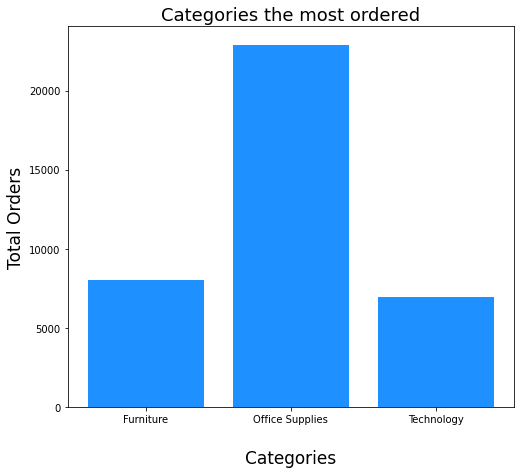

In [16]:
total_order=data.groupby('Category')['Quantity'].sum().reset_index()
print(total_order)
plt.figure(figsize=(8,7))
plt.title('Categories the most ordered',size=18)
plt.bar(total_order['Category'],total_order['Quantity'],color='dodgerblue')
plt.xlabel('\nCategories',size=17)
plt.ylabel('Total Orders',size=17)
plt.show()

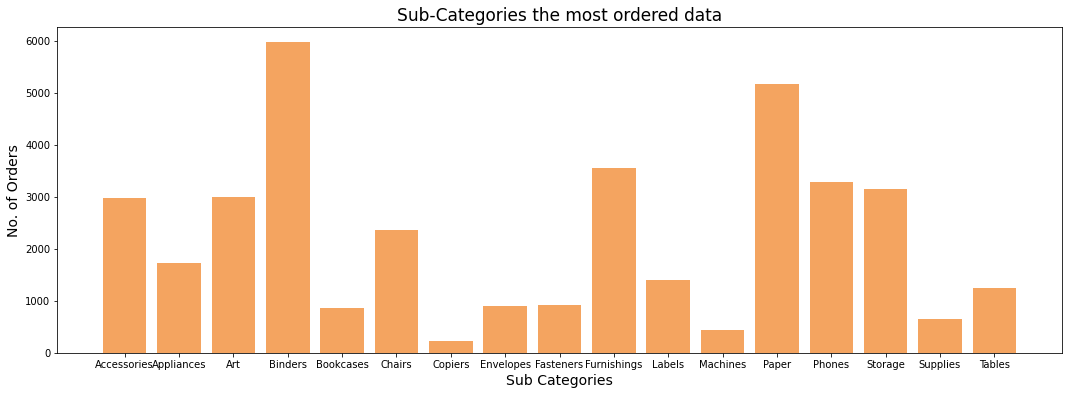

In [19]:
total_order=data.groupby('Sub-Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(18,6))
plt.bar(total_order['Sub-Category'],total_order['Quantity'],color='sandybrown')
plt.title('Sub-Categories the most ordered data',size=17)
plt.xlabel('Sub Categories',size=14)
plt.ylabel('No. of Orders',size=14)
plt.show()

# quantities ordered by the each segment

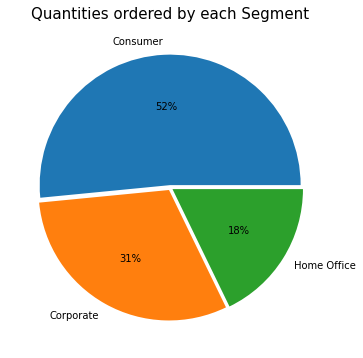

In [22]:
segment=data.groupby('Segment')['Quantity'].sum().reset_index()
plt.figure(figsize=(7,6))
plt.title('Quantities ordered by each Segment',size=15)
plt.pie(segment['Quantity'],autopct='%1.f%%',explode=(0.02,0.02,0.02),labels=data['Segment'].unique())
plt.show()

# Region which have highest sales

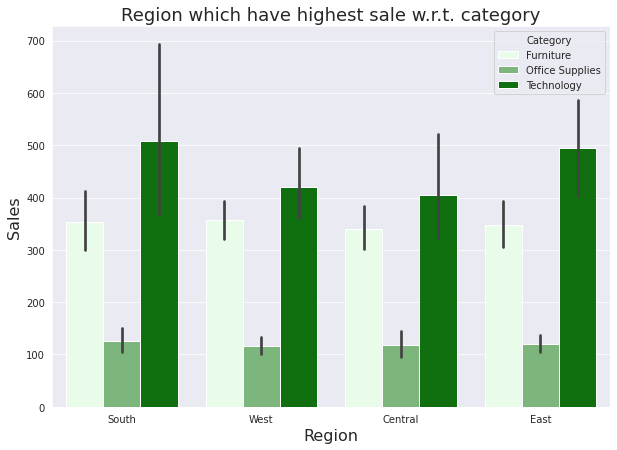

In [24]:
plt.figure(figsize=(10,7))
plt.title('Region which have highest sale w.r.t. category',size=18)
plt.xlabel('Region',size=16)
plt.ylabel('Sales',size=16)
sns.set_style('darkgrid')
sns.barplot(data['Region'],data['Sales'],hue=data['Category'],color='green')
plt.show()

#State which have most and Sale

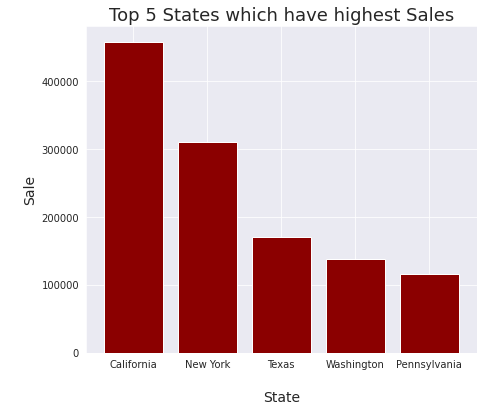

In [28]:
states=data.groupby('State')['Sales'].sum().reset_index()
top_5=states.sort_values('Sales',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 States which have highest Sales',size=18)
plt.bar(top_5['State'],top_5['Sales'],color='darkred')
plt.xlabel('\nState',size=14)
plt.ylabel('\nSale',size=14)
plt.show()

#Cities which have most Sales¶

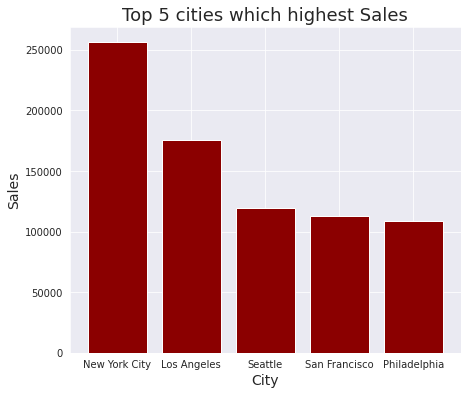

In [30]:
cities=data.groupby('City')['Sales'].sum().reset_index()
top_5=cities.sort_values('Sales',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 cities which highest Sales',size=18)
plt.bar(top_5['City'],top_5['Sales'],color='darkred')
plt.xlabel('City',size=14)
plt.ylabel('Sales',size=14)
plt.show()


# States which have most and least Profit

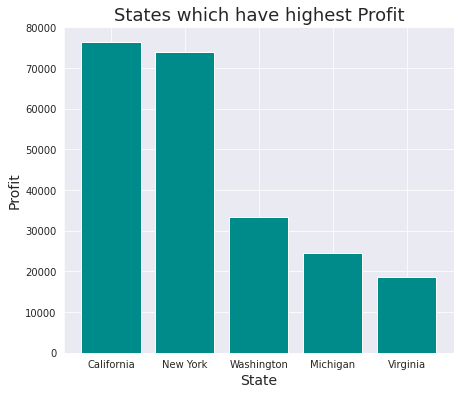

In [31]:
states=data.groupby('State')['Profit'].sum().reset_index()
top_5=states.sort_values('Profit',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('States which have highest Profit',size=18)
plt.bar(top_5['State'],top_5['Profit'],color='darkcyan')
plt.xlabel('State',size=14)
plt.ylabel('Profit',size=14)
plt.show()


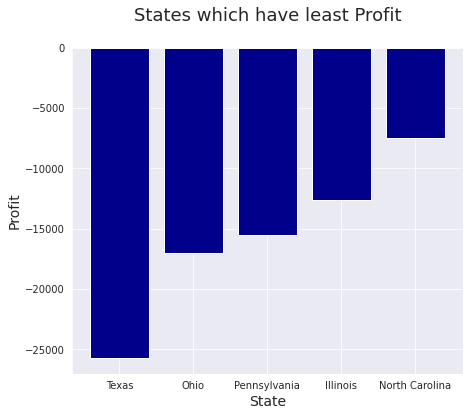

In [33]:
last_5=states.sort_values('Profit',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('States which have least Profit',size=18)
plt.bar(last_5['State'],last_5['Profit'],color='darkblue')
plt.xlabel('State',size=14)
plt.ylabel('Profit',size=14)
plt.show()

# Cities which have most and least Profit

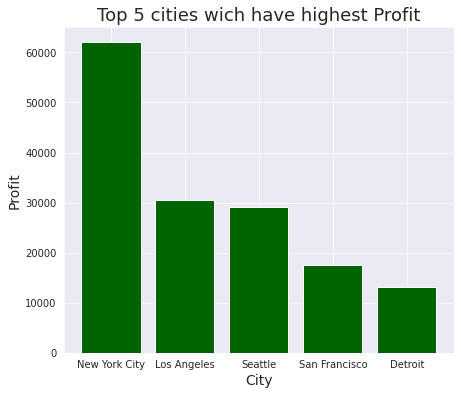

In [34]:
cities=data.groupby('City')['Profit'].sum().reset_index()
top_5=cities.sort_values('Profit',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 cities wich have highest Profit',size=18)
plt.bar(top_5['City'],top_5['Profit'],color='darkgreen')
plt.xlabel('City',size=14)
plt.ylabel('Profit',size=14)
plt.show()

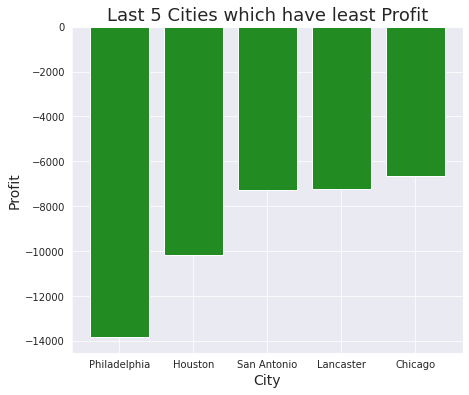

In [36]:
last_5=cities.sort_values('Profit',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('Last 5 Cities which have least Profit',size=18)
plt.bar(last_5['City'],last_5['Profit'],color='forestgreen')
plt.xlabel('City',size=14)
plt.ylabel('Profit',size=14)
plt.show()

# Categories the data with respect to most Sales, Profits and Discounts

In [38]:
sub_data=data.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

In [39]:
sub_data

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


In [40]:
sub_data=data.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

In [41]:
sub_data

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


In [42]:
sub_data=data.groupby('Category')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)

In [43]:
sub_data

,Category,Discount
1,Office Supplies,947.80
0,Furniture,368.89
2,Technology,244.40


 # most profitable product most sold items

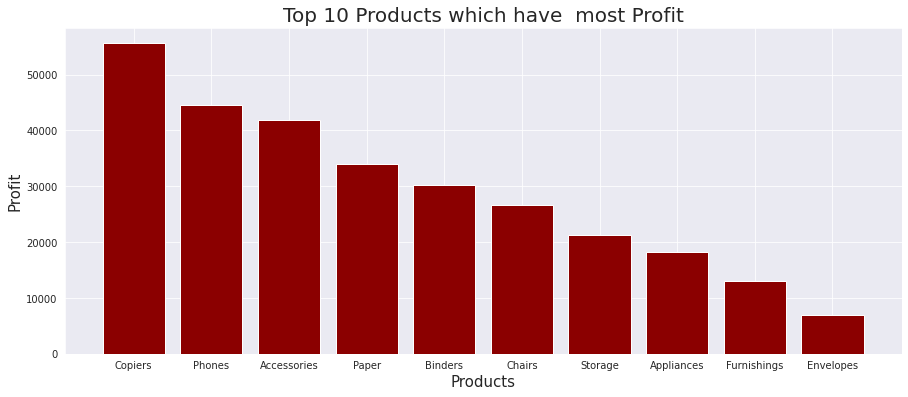

In [44]:
subcategories=data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.title('Top 10 Products which have  most Profit',size=20)
plt.bar(subcategories['Sub-Category'],subcategories['Profit'],color='darkred')
plt.xlabel('Products',size=15)
plt.ylabel('Profit',size=15)
plt.show()

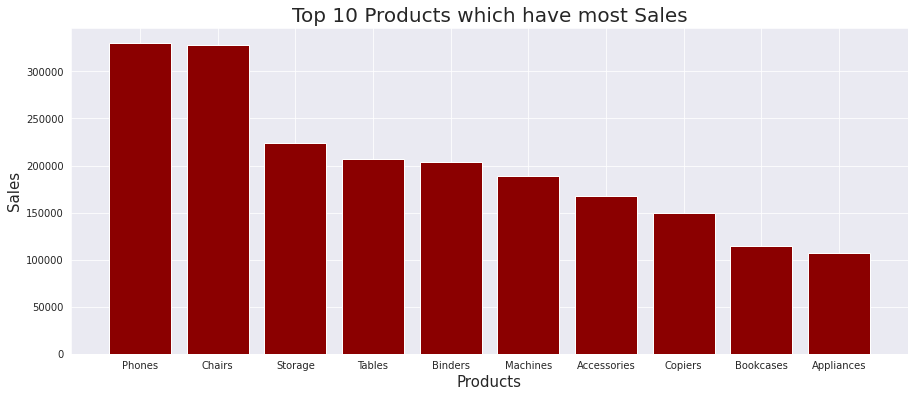

In [46]:
subcategories=data.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.title('Top 10 Products which have most Sales',size=20)
plt.bar(subcategories['Sub-Category'],subcategories['Sales'],color='darkred')
plt.xlabel('Products',size=15)
plt.ylabel('Sales',size=15)
plt.show()

Analyzed by the 
# Amit Kumar Pathak